https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/logistic_regression/main.py#L33-L34

# Логистическая Регрессия

Логистическая регрессия - это метод, который используется для решения задач классификации, то есть для определения категории или класса, к которому принадлежит некоторый объект или наблюдение

## Основные понятия

- **Бинарная Классификация**: Логистическая регрессия применяется чаще всего в задачах бинарной классификации, где необходимо отнести объект к одному из двух классов (например, "положительный" или "отрицательный" результат).

- **Логистическая Функция для Бинарной классификации**: Центральным элементом логистической регрессии является логистическая функция (сигмоида), которая преобразует линейную комбинацию входных признаков в вероятность принадлежности к одному из классов. Формула сигмоиды:

    $P(Y=1) = 1 / (1 + e^{-(w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n)})$

  где:
  - $P(Y=1)$ - вероятность принадлежности к классу 1.
  - $w_0, w_1, \ldots, w_n$ - веса, которые модель настраивает в процессе обучения.
  - $x_1, x_2, \ldots, x_n$ - входные признаки.

## Цель логистической регрессии

Цель логистической регрессии - настроить веса модели так, чтобы она могла предсказывать вероятности принадлежности объекта к классу 1. Затем можно установить порог вероятности (например, 0.5), чтобы классифицировать объекты.

## Обучение Логистической Регрессии

Процесс обучения логистической регрессии включает в себя нахождение оптимальных значений весов $w_0, w_1, \ldots, w_n$, которые минимизируют ошибку модели

## Применение Логистической Регрессии

Логистическая регрессия может быть использована для решения множества задач классификации, таких как:
- Диагностика болезней (например, предсказание наличия или отсутствия заболевания)
- Финансовые решения (например, определение вероятности невозврата кредита)
- Рекомендации (например, классификация продуктов или контента для пользователей)

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
from matplotlib import pyplot as plt

In [3]:
# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# 1 Этап - Данные

1. Создаем переменную `train_dataset`, которая представляет собой обучающий набор данных MNIST. Параметры включают:

    `root='../../data'` - путь к корневой директории, где будут сохранены данные (если они ещё не скачаны)
    
    `train=True` - указывает, что мы загружаем обучающий набор данных
    
    `transform=transforms.ToTensor()` - применяет преобразование к данным, которое преобразует изображения в тензоры PyTorch
    
    `download=True` - указывает, что данные должны быть автоматически загружены, если они еще не были скачаны
    
2. Аналогично, создается переменная `test_dataset`, представляющая тестовый набор данных MNIST. Однако `train=False`, что указывает на загрузку тестовых данных

3. Далее создаются загрузчики данных для обучения и тестирования:

    `train_loader` – загрузчик данных для обучения. Здесь мы используем `train_dataset`, устанавливаем размер пакета (`batch_size`), и перемешиваем данные (`shuffle=True`), чтобы случайным образом перетасовать порядок данных для каждой эпохи обучения
    
    `test_loader` – загрузчик данных для тестирования, но данные не перемешиваются, так как порядок данных в тестовом наборе должен оставаться неизменным (`shuffle=False`)

In [4]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [5]:
len(train_dataset)

60000

Извлекаем первый элемент из обучающего набора данных MNIST. x содержит изображение, а y содержит метку (класс) этого изображения

In [6]:
x, y = train_dataset[0]

In [7]:
x.shape

torch.Size([1, 28, 28])

In [8]:
y

5

`.flatten()` преобразует изображение в одномерный массив (вектор)

In [9]:
x.flatten().shape

torch.Size([784])

`.reshape(-1)` преобразует изображение в одномерный массив без указания размера вручную. -1 означает, что размер будет автоматически вычислен

In [10]:
x.reshape(-1).shape

torch.Size([784])

`.squeeze()` удаляет размерность с единичной длиной (например, размерность 1x28x28 превращается в 28x28), для того, чтобы мы могли отобразить изображение с помощью библиотеки для визуализации

In [11]:
x.squeeze().shape

torch.Size([28, 28])

In [12]:
y

5

Отображение изображения x после удаления размерности с единичной длиной

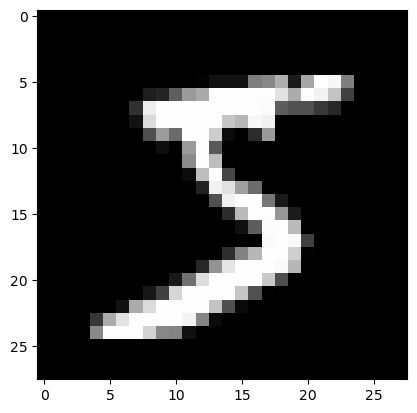

In [13]:
plt.imshow(x.squeeze(), cmap='gray')

In [14]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


# 2 этап - Нейронная сеть

В PyTorch обе регрессии, как линейная, так и логистическая, могут быть реализованы с использованием `torch.nn.Linear`, потому что обе регрессии базируются на линейной комбинации входных признаков с весами, и `torch.nn.Linear` предоставляет удобный способ определения этой линейной связи. Это справедливо как для линейной регрессии, где предсказываются непрерывные значения, так и для логистической регрессии, где предсказываются вероятности.

Важно понимать, что `torch.nn.Linear` является общим инструментом, и его называют «линейным слоем» в нейронных сетях. Важно помнить, что тип регрессии (линейная или логистическая) определяется не только использованием `torch.nn.Linear`, но также выбором функции активации и целевой функции. Для логистической регрессии, используется сигмоидальная функция активации и кросс-энтропия как целевая функция, тогда как для линейной регрессии обычно используется среднеквадратическая ошибка в качестве целевой функции

In [15]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [16]:
model

Linear(in_features=784, out_features=10, bias=True)

In [17]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0235, -0.0231,  0.0061,  ...,  0.0352,  0.0032,  0.0196],
        [-0.0159,  0.0163,  0.0131,  ...,  0.0283,  0.0137,  0.0149],
        [ 0.0010, -0.0018, -0.0275,  ..., -0.0127,  0.0114,  0.0068],
        ...,
        [-0.0225,  0.0109,  0.0348,  ...,  0.0074, -0.0098, -0.0286],
        [-0.0008, -0.0088,  0.0229,  ..., -0.0288,  0.0134,  0.0238],
        [ 0.0193, -0.0224, -0.0070,  ..., -0.0191,  0.0324,  0.0302]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0128,  0.0239, -0.0020, -0.0331,  0.0066,  0.0041, -0.0082,  0.0055,
         0.0340,  0.0253], requires_grad=True)


In [18]:
model.weight.data

tensor([[ 0.0235, -0.0231,  0.0061,  ...,  0.0352,  0.0032,  0.0196],
        [-0.0159,  0.0163,  0.0131,  ...,  0.0283,  0.0137,  0.0149],
        [ 0.0010, -0.0018, -0.0275,  ..., -0.0127,  0.0114,  0.0068],
        ...,
        [-0.0225,  0.0109,  0.0348,  ...,  0.0074, -0.0098, -0.0286],
        [-0.0008, -0.0088,  0.0229,  ..., -0.0288,  0.0134,  0.0238],
        [ 0.0193, -0.0224, -0.0070,  ..., -0.0191,  0.0324,  0.0302]])

In [19]:
model.bias.data

tensor([ 0.0128,  0.0239, -0.0020, -0.0331,  0.0066,  0.0041, -0.0082,  0.0055,
         0.0340,  0.0253])

In [20]:
x = torch.randn(784)
model(x)

tensor([ 0.5146,  0.3688,  0.0502,  0.3042, -0.0111, -0.3448, -1.3251, -0.1318,
         0.5588,  0.0792], grad_fn=<ViewBackward0>)

In [21]:
x, y = train_dataset[0]
model(x.flatten())

tensor([ 0.2290,  0.2785,  0.1962, -0.1912,  0.0753, -0.0468, -0.1651,  0.1211,
        -0.1925, -0.2891], grad_fn=<ViewBackward0>)

# 3 этап - Оптимизация и лосс-функция

`nn.CrossEntropyLoss()` - Это функция потерь, которая обычно используется в задачах многоклассовой классификации. Она предназначена для оценки разницы между предсказаниями модели и фактическими метками (целевыми классами) в задаче классификации. `nn.CrossEntropyLoss()` автоматически применяет софтмакс функцию к выходам модели, преобразуя их в вероятности, а затем сравнивает предсказанные вероятности с истинными метками.

Кросс-энтропийная функция потерь для многоклассовой классификации определяется следующим образом:

$
H(y, p) = -\sum_{i=1}^{N} y_i \log(p_i)
$

Где:
- $H(y, p)$ - кросс-энтропийная потеря
- $y_i$ - истинная вероятность принадлежности объекта к классу $i$
- $p_i$ - предсказанная вероятность принадлежности объекта к классу $i$ моделью.

Эта функция измеряет разницу между истинными вероятностями ($y_i$) и предсказанными вероятностями ($p_i$). Чем ближе предсказанные вероятности к истинным, тем меньше будет значение кросс-энтропийной потери. Главная цель обучения – минимизировать эту потерю.

В кросс-энтропийной функции потерь (CrossEntropyLoss) предсказанная вероятность ($p_i$) вычисляется с использованием функции softmax для преобразования необработанных выходов модели (часто называемых «логитами») в вероятности принадлежности объекта к разным классам.

Формула для предсказанной вероятности $p_i$ в контексте кросс-энтропийной функции потерь выглядит следующим образом:

$
p_i = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}
$

Где:
- $p_i$ - предсказанная вероятность принадлежности объекта к классу $i$.
- $z_i$ - необработанный выход (логит) модели для класса $i$.
- $\sum_{j=1}^{N} e^{z_j}$ - сумма экспоненты необработанных выходов для всех классов $N$.

Суть softmax заключается в том, что она преобразует логиты в вероятности так, чтобы сумма вероятностей для всех классов была равна 1

In [22]:
# Loss
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()

Оптимизатор Adam сочетает метод моментума и адаптивный метод изменения скорости обучения. Его обновление параметров $w$ происходит следующим образом:

$
w_{t+1} = w_t - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$

Где:
- $w_t$ - параметры модели в момент времени $t$
- $\alpha$ - скорость обучения (learning rate)
- $\hat{m}_t$ - оценка момента градиента
- $\hat{v}_t$ - оценка второго момента градиента
- $\epsilon$ - маленькое число для предотвращения деления на ноль

Оценки момента градиента и второго момента градиента вычисляются следующим образом:

$
\hat{m}_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t
$

$
\hat{v}_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2
$

Где:
- $g_t$ - градиент в момент времени $t$
- $\beta_1$ и $\beta_2$ - параметры адаптивных оценок моментов и вторых моментов

In [23]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# 4 этап - Обучение

In [24]:
# Train the model
total_step = len(train_loader) # общее количество «шагов» (или пакетов данных) в обучающем наборе данных
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)             # Модель принимает изображения и возвращает предсказанные выходы
        loss = criterion(outputs, labels)   # Вычисляем потерю (ошибку) между предсказанными выходами outputs и
                                            # истинными метками labels с использованием кросс-энтропийной функции потерь
        
        # Backward and optimize
        optimizer.zero_grad()   # Обнуляем градиенты (производные потерь) для всех параметров модели
        loss.backward()         # Вычисляем градиенты параметров модели относительно потерь 
                                # с использованием автоматического дифференцирования
        optimizer.step()        # Выполняем шаг оптимизации, обновляя параметры модели на основе рассчитанных градиентов
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4428
Epoch [1/5], Step [200/600], Loss: 0.7990
Epoch [1/5], Step [300/600], Loss: 0.8967
Epoch [1/5], Step [400/600], Loss: 0.4775
Epoch [1/5], Step [500/600], Loss: 0.9602
Epoch [1/5], Step [600/600], Loss: 0.9280
Epoch [2/5], Step [100/600], Loss: 1.2124
Epoch [2/5], Step [200/600], Loss: 0.6033
Epoch [2/5], Step [300/600], Loss: 0.7631
Epoch [2/5], Step [400/600], Loss: 0.9903
Epoch [2/5], Step [500/600], Loss: 0.4549
Epoch [2/5], Step [600/600], Loss: 2.0234
Epoch [3/5], Step [100/600], Loss: 1.1924
Epoch [3/5], Step [200/600], Loss: 0.7880
Epoch [3/5], Step [300/600], Loss: 0.9476
Epoch [3/5], Step [400/600], Loss: 1.2323
Epoch [3/5], Step [500/600], Loss: 1.4047
Epoch [3/5], Step [600/600], Loss: 2.3821
Epoch [4/5], Step [100/600], Loss: 0.1584
Epoch [4/5], Step [200/600], Loss: 1.1864
Epoch [4/5], Step [300/600], Loss: 0.8017
Epoch [4/5], Step [400/600], Loss: 0.7501
Epoch [4/5], Step [500/600], Loss: 0.9515
Epoch [4/5], Step [600/600], Loss:

Оцениваем точность модели на тестовых данных и сохраняем параметры модели для дальнейшего использования

In [25]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
#with torch.no_grad():
correct = 0
total = 0
for images, labels in test_loader:
    images = images.reshape(-1, input_size)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)   # Класс с наивысшей оценкой (предсказанный класс) для каждого 
                                                # изображения (выбираем индекс с наивысшей оценкой из выхода модели)
    total += labels.size(0)                     # Обновляем общее количество проверенных объектов, добавляя размер 
                                                # текущей партии (batch) меток
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the model on the 10000 test images: 87.62999725341797 %
